In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/openmoji.csv' 
df = pd.read_csv(file_path)

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   emoji                  4284 non-null   object 
 1   hexcode                4284 non-null   object 
 2   group                  4284 non-null   object 
 3   subgroups              4284 non-null   object 
 4   annotation             4284 non-null   object 
 5   tags                   1907 non-null   object 
 6   openmoji_tags          392 non-null    object 
 7   openmoji_author        4284 non-null   object 
 8   openmoji_date          4284 non-null   object 
 9   skintone               1875 non-null   object 
 10  skintone_combination   2198 non-null   object 
 11  skintone_base_emoji    2198 non-null   object 
 12  skintone_base_hexcode  2198 non-null   object 
 13  unicode                3903 non-null   object 
 14  order                  3782 non-null   float64
dtypes: f

,emoji,hexcode,group,subgroups,annotation,tags,openmoji_tags,openmoji_author,openmoji_date,skintone,skintone_combination,skintone_base_emoji,skintone_base_hexcode,unicode,order
0,😀,1F600,smileys-emotion,face-smiling,grinning face,"face, grin",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,1,1.0
1,😃,1F603,smileys-emotion,face-smiling,grinning face with big eyes,"face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,2.0
2,😄,1F604,smileys-emotion,face-smiling,grinning face with smiling eyes,"eye, face, mouth, open, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,3.0
3,😁,1F601,smileys-emotion,face-smiling,beaming face with smiling eyes,"eye, face, grin, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,4.0
4,😆,1F606,smileys-emotion,face-smiling,grinning squinting face,"face, laugh, mouth, satisfied, smile",NaN,Emily Jäger,2018-04-18,NaN,NaN,NaN,NaN,0.6,5.0


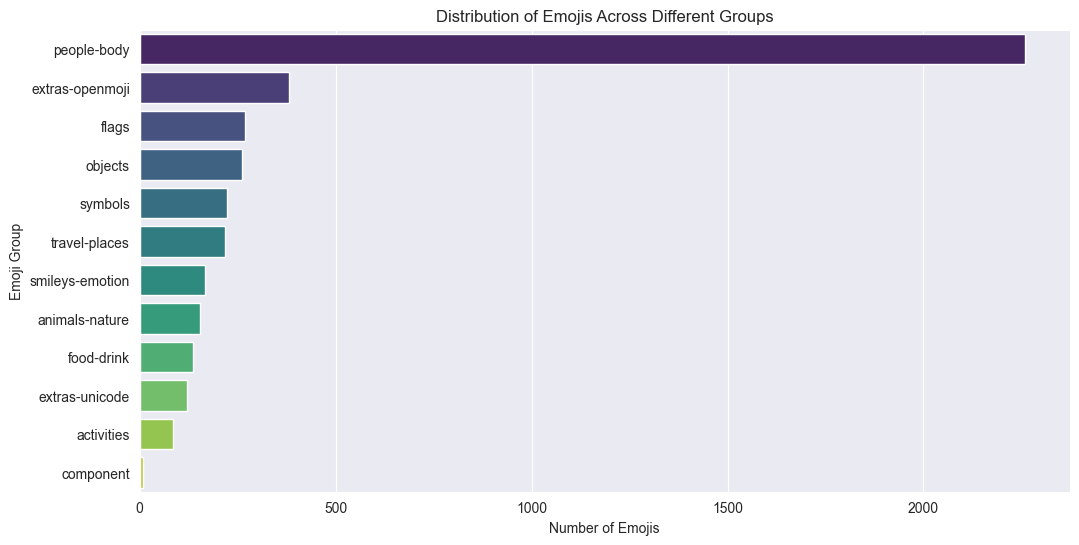

In [2]:
group_counts = df["group"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=group_counts.values, 
    y=group_counts.index, 
    hue=group_counts.index,
    palette="viridis", 
    legend=False
)
plt.xlabel("Number of Emojis")
plt.ylabel("Emoji Group")
plt.title("Distribution of Emojis Across Different Groups")
plt.show()


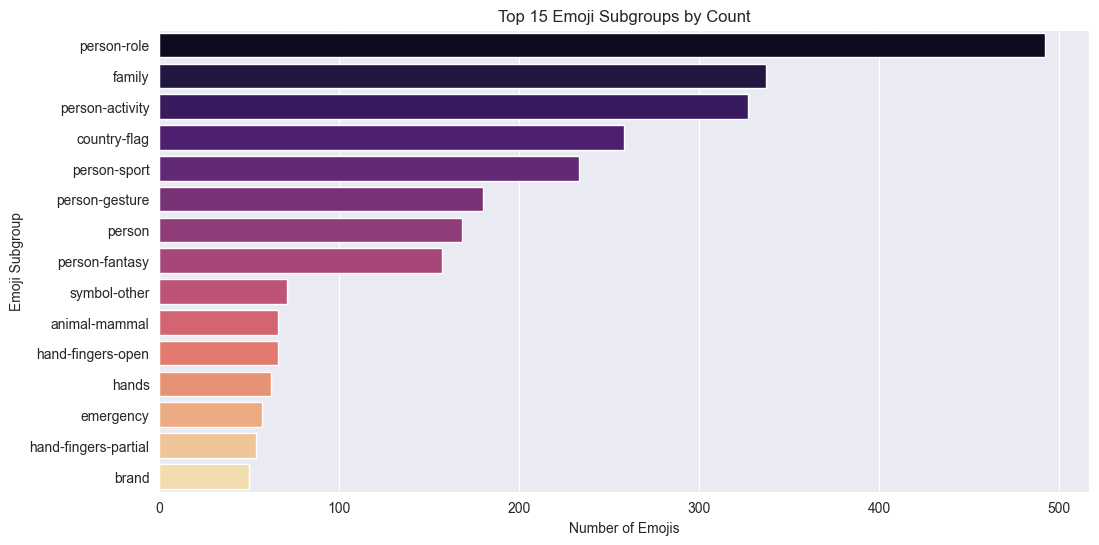

In [3]:
subgroup_counts = df["subgroups"].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=subgroup_counts.values, 
    y=subgroup_counts.index, 
    hue=subgroup_counts.index,  
    palette="magma", 
    legend=False 
)
plt.xlabel("Number of Emojis")
plt.ylabel("Emoji Subgroup")
plt.title("Top 15 Emoji Subgroups by Count")
plt.show()


In [4]:
from collections import Counter
from wordcloud import WordCloud

text_data = " ".join(df["annotation"].dropna().astype(str)) + " " + " ".join(df["tags"].dropna().astype(str))
word_freq = Counter(text_data.lower().split())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Emoji Annotations & Tags")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
skin_tone_base_counts = df["skintone_base_hexcode"].dropna().value_counts().head(15)  # Top 15

plt.figure(figsize=(12, 6))
sns.barplot(
    x=skin_tone_base_counts.values, 
    y=skin_tone_base_counts.index, 
    hue=skin_tone_base_counts.index, 
    palette="coolwarm", 
    legend=False
)
plt.xlabel("Number of Emojis")
plt.ylabel("Skin Tone Base Hexcode")
plt.title("Top 15 Skin Tone Base Hexcodes in Emojis")
plt.show()


In [ ]:
skin_tone_combo_counts = df["skintone_combination"].dropna().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=skin_tone_combo_counts.values, 
    y=skin_tone_combo_counts.index, 
    hue=skin_tone_combo_counts.index,
    palette="magma", 
    legend=False  
)
plt.xlabel("Number of Emojis")
plt.ylabel("Skin Tone Combinations")
plt.title("Skin Tone Combinations in Emojis")
plt.xticks(rotation=45)
plt.show()
